In [1]:
import pandas as pd
file = "ML_Houses_dataset.csv"
data = pd.read_csv(file)
data = data[["GrLivArea","BedroomAbvGr", "KitchenAbvGr", "OverallCond", "Pesos","Alley","Street","WallMat","SalePrice"]]
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,WallMat,SalePrice
0,1710,3,1,5,4170000.0,NaN,Pave,Concrete,208500
1,1262,3,1,8,3630000.0,NaN,Pave,Wood,181500
2,1786,3,1,5,4470000.0,NaN,Pave,Wood,223500
3,1717,3,1,5,2800000.0,NaN,Pave,Concrete,140000
4,2198,4,1,5,5000000.0,NaN,Pave,Concrete,250000


In [2]:
len(data) 


1760

In [3]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1755     True
1756     True
1757     True
1758     True
1759     True
Length: 1760, dtype: bool

In [4]:
data.duplicated().sum()

303

In [5]:
data = data.drop_duplicates()

In [6]:
len(data)

1457

In [7]:
data.isnull().sum().sort_values(ascending=False) 

WallMat         1452
Alley           1367
Pesos             10
GrLivArea          0
BedroomAbvGr       0
KitchenAbvGr       0
OverallCond        0
Street             0
SalePrice          0
dtype: int64

In [8]:
data["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [9]:
data["WallMat"].unique()

array(['Concrete', 'Wood', nan], dtype=object)

In [10]:
# 99% is way too high, let's drop this feature
data.drop(columns='WallMat', inplace=True) # Drop WallMat column 
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice
0,1710,3,1,5,4170000.0,NaN,Pave,208500
1,1262,3,1,8,3630000.0,NaN,Pave,181500
2,1786,3,1,5,4470000.0,NaN,Pave,223500
3,1717,3,1,5,2800000.0,NaN,Pave,140000
4,2198,4,1,5,5000000.0,NaN,Pave,250000


In [11]:
import numpy as np
data.Alley.fillna("No Alley", inplace=True)
data.Alley.value_counts()#
# data.Alley.replace(np.nan, "NoAlley", inplace=True) #Replace NaN by "NoAlley"
# data.Alley.value_counts()

No Alley    1367
Grvl          50
Pave          40
Name: Alley, dtype: int64

In [12]:
data.Pesos.replace(np.nan, data.Pesos.mean()) 

0       4170000.0
1       3630000.0
2       4470000.0
3       2800000.0
4       5000000.0
          ...    
1455    3500000.0
1456    4200000.0
1457    5330000.0
1458    2842500.0
1459    2950000.0
Name: Pesos, Length: 1457, dtype: float64

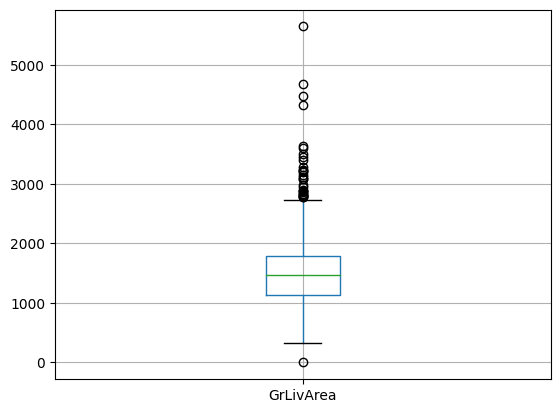

In [13]:
data[['GrLivArea']].boxplot();

In [14]:
data['GrLivArea'].min() 

-1

In [15]:
# Saving the indexes corresponding to rows 
# without the absurd -1 value
# and without the mansion
boolean_mask = (data['GrLivArea']>0) & (data['GrLivArea']<5000)

# Applying the boolean filteraing
data = data[boolean_mask].reset_index(drop=True)

# Visualize boxplot again
data[['GrLivArea']].boxplot();

In [16]:
data[['GrLivArea']].boxplot();

In [17]:
data[['GrLivArea']].boxplot();

In [19]:
data['GrLivArea'].min() 

334

In [20]:

from sklearn.preprocessing import RobustScaler

# Step 0 - Instanciate Robust Scaler

rb_scaler = RobustScaler() 

# Step 1- Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR

rb_scaler.fit(data[['GrLivArea']]) 

# 2-Scale/Transform
# <-> apply the transformation (value - median) / IQR for every house

data['GrLivArea'] = rb_scaler.transform(data[['GrLivArea']]) 

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice
0,0.380216,3,1,5,4170000.0,No Alley,Pave,208500
1,-0.312210,3,1,8,3630000.0,No Alley,Pave,181500
2,0.497682,3,1,5,4470000.0,No Alley,Pave,223500
3,0.391036,3,1,5,2800000.0,No Alley,Pave,140000
4,1.134467,4,1,5,5000000.0,No Alley,Pave,250000


In [21]:
example = pd.DataFrame({"classes":["bad", "average", "average", "good", "good", "bad", "good"]})
example

,classes
0,bad
1,average
2,average
3,good
4,good
5,bad
6,good


In [23]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories = [["bad","average","good"]])

# Fit it
ordinal_encoder.fit(example[["classes"]])

# Display the learned categories
display(ordinal_encoder.categories_)

# Transforming categories into ordered numbers
example["encoded_classes"] = ordinal_encoder.transform(example[["classes"]])

# Showing the transformed classes
example

[array(['bad', 'average', 'good'], dtype=object)]

,classes,encoded_classes
0,bad,0.0
1,average,1.0
2,average,1.0
3,good,2.0
4,good,2.0
5,bad,0.0
6,good,2.0


In [24]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Check unique values for streets (3)
print(f"The unique values for 'Street' are {data.Alley.unique()}")

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output = False) 

# Fit encoder
ohe.fit(data[['Alley']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

The unique values for 'Street' are ['No Alley' 'Grvl' 'Pave']
The categories detected by the OneHotEncoder are [array(['Grvl', 'No Alley', 'Pave'], dtype=object)]


In [25]:
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

The column names for the encoded values are ['Alley_Grvl' 'Alley_No Alley' 'Alley_Pave']


In [28]:
data[ohe.get_feature_names_out()] = ohe.transform(data[['Alley']])
data.drop(columns = ["Alley"], inplace = True)

In [29]:
data.head(3)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Street,SalePrice,Alley_Grvl,Alley_No Alley,Alley_Pave
0,0.380216,3,1,5,4170000.0,Pave,208500,0.0,1.0,0.0
1,-0.312210,3,1,8,3630000.0,Pave,181500,0.0,1.0,0.0
2,0.497682,3,1,5,4470000.0,Pave,223500,0.0,1.0,0.0


In [30]:
from sklearn.preprocessing import OneHotEncoder

# Check unique values for streets (2)
print(f"The unique values for 'Street' are {data.Street.unique()}")

# Instantiate the OneHotEncoder
ohe_binary = OneHotEncoder(sparse_output = False, drop="if_binary") 

# Fit encoder
ohe_binary.fit(data[['Street']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe_binary.categories_}")

The unique values for 'Street' are ['Pave' 'Grvl']
The categories detected by the OneHotEncoder are [array(['Grvl', 'Pave'], dtype=object)]


In [31]:
print(f"The column names for the encoded values are {ohe_binary.get_feature_names_out()}")

# Transform the current "Street" column
data[ohe_binary.get_feature_names_out()] = ohe_binary.transform(data[['Street']])

# Drop the column "Street" which has been encoded
data.drop(columns = ["Street"], inplace = True)

# Show the dataset
data.head(3)

The column names for the encoded values are ['Street_Pave']


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,SalePrice,Alley_Grvl,Alley_No Alley,Alley_Pave,Street_Pave
0,0.380216,3,1,5,4170000.0,208500,0.0,1.0,0.0,1.0
1,-0.312210,3,1,8,3630000.0,181500,0.0,1.0,0.0,1.0
2,0.497682,3,1,5,4470000.0,223500,0.0,1.0,0.0,1.0


In [32]:
data['SalePriceBinary'] = pd.cut(x = data['SalePrice'],
                                 bins=[data['SalePrice'].min()-1,
                                       data['SalePrice'].mean(),
                                       data['SalePrice'].max()+1], 
                                 labels=['cheap', 'expensive'])

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,SalePrice,Alley_Grvl,Alley_No Alley,Alley_Pave,Street_Pave,SalePriceBinary
0,0.380216,3,1,5,4170000.0,208500,0.0,1.0,0.0,1.0,expensive
1,-0.312210,3,1,8,3630000.0,181500,0.0,1.0,0.0,1.0,expensive
2,0.497682,3,1,5,4470000.0,223500,0.0,1.0,0.0,1.0,expensive
3,0.391036,3,1,5,2800000.0,140000,0.0,1.0,0.0,1.0,cheap
4,1.134467,4,1,5,5000000.0,250000,0.0,1.0,0.0,1.0,expensive


In [33]:
data.drop(columns=['Pesos'], inplace=True)


In [34]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,SalePrice,Alley_Grvl,Alley_No Alley,Alley_Pave,Street_Pave,SalePriceBinary
0,0.380216,3,1,5,208500,0.0,1.0,0.0,1.0,expensive
1,-0.312210,3,1,8,181500,0.0,1.0,0.0,1.0,expensive
2,0.497682,3,1,5,223500,0.0,1.0,0.0,1.0,expensive
3,0.391036,3,1,5,140000,0.0,1.0,0.0,1.0,cheap
4,1.134467,4,1,5,250000,0.0,1.0,0.0,1.0,expensive


In [35]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Encoding the target
target_encoder = LabelEncoder().fit(data['SalePriceBinary']) 
y = target_encoder.transform(data['SalePriceBinary'])

# Defining the features
X = data.drop(columns=['SalePrice', 'SalePriceBinary'])

# Scaling numerical features
# Notice that we already RobutScaled GrLivArea
minmax_scaler = MinMaxScaler()
X[["BedroomAbvGr","KitchenAbvGr","OverallCond"]] = minmax_scaler.fit_transform(X[["BedroomAbvGr","KitchenAbvGr","OverallCond"]])

# Instantiate model
log_reg = LogisticRegression(max_iter=1000) 

# Scoring on multiple folds aka Cross Validation
scores = cross_val_score(log_reg, X, y, cv=10)
scores.mean()

0.8308455361360416